In [1]:
from yolopandas import pd

In [2]:
product_df = pd.DataFrame(
    [
        {"name": "The Da Vinci Code", "type": "book", "price": 15, "quantity": 300, "rating": 4},
        {"name": "Jurassic Park", "type": "book", "price": 12, "quantity": 400, "rating": 4.5},
        {"name": "Jurassic Park", "type": "film", "price": 8, "quantity": 6, "rating": 5},
        {"name": "Matilda", "type": "book", "price": 5, "quantity": 80, "rating": 4},
        {"name": "Clockwork Orange", "type": None, "price": None, "quantity": 20, "rating": 4},
        {"name": "Walden", "type": None, "price": None, "quantity": 100, "rating": 4.5},
    ],
)

product_df

,name,type,price,quantity,rating
0,The Da Vinci Code,book,15.0,300,4.0
1,Jurassic Park,book,12.0,400,4.5
2,Jurassic Park,film,8.0,6,5.0
3,Matilda,book,5.0,80,4.0
4,Clockwork Orange,None,NaN,20,4.0
5,Walden,None,NaN,100,4.5


In [3]:
product_df.llm.query("What columns are missing values?")

df.isnull().sum()


name        0
type        2
price       2
quantity    0
rating      0
dtype: int64

In [4]:
product_df.llm.query("Of these, are any strings?", yolo=True)

name    0
type    2
dtype: int64

In [5]:
product_df.llm.query("Impute the type column with random fruits.")

import random

fruits = ['apple', 'banana', 'orange', 'strawberry', 'grape']

df['type'] = df['type'].fillna(random.choice(fruits))


In [6]:
product_df

,name,type,price,quantity,rating
0,The Da Vinci Code,book,15.0,300,4.0
1,Jurassic Park,book,12.0,400,4.5
2,Jurassic Park,film,8.0,6,5.0
3,Matilda,book,5.0,80,4.0
4,Clockwork Orange,apple,NaN,20,4.0
5,Walden,apple,NaN,100,4.5


In [7]:
from IPython.display import display


df1, df2 = product_df.llm.query("Split the dataframe into two, 1/3 in one, 2/3 in the other. Return (df1, df2).")

display(df1)
display(df2)

split_index = round(len(df) / 3)

df1 = df[:split_index]
df2 = df[split_index:]

(df1, df2)


,name,type,price,quantity,rating
0,The Da Vinci Code,book,15.0,300,4.0
1,Jurassic Park,book,12.0,400,4.5


,name,type,price,quantity,rating
2,Jurassic Park,film,8.0,6,5.0
3,Matilda,book,5.0,80,4.0
4,Clockwork Orange,apple,NaN,20,4.0
5,Walden,apple,NaN,100,4.5


In [8]:
product_df.llm.query("Now show me all products that are books.")

df[df['type'] == 'book']


,name,type,price,quantity,rating
0,The Da Vinci Code,book,15.0,300,4.0
1,Jurassic Park,book,12.0,400,4.5
3,Matilda,book,5.0,80,4.0


In [9]:
product_df.llm.query("Of these, which has the lowest items stocked?")

df[df['type'] == 'book'].sort_values(by='quantity').head(1)


,name,type,price,quantity,rating
3,Matilda,book,5.0,80,4.0


import seaborn as sns

sns.catplot(x='type', y='price', data=df[df['type'] != 'apple'], kind='bar')


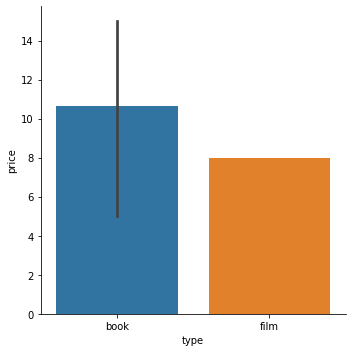

In [10]:
product_df.llm.query("Now make a seaborn plot of price grouped by type, but exclude those random fruits you made.")

import seaborn as sns

sns.set_style("dark")
sns.set_palette("pastel")

sns.catplot(x='type', y='price', data=df[df['type'] != 'apple'], kind='bar')


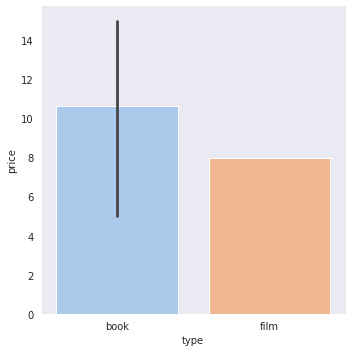

In [11]:
product_df.llm.query("Can you use a dark theme, and pastel colors?")

<AxesSubplot:xlabel='type'>

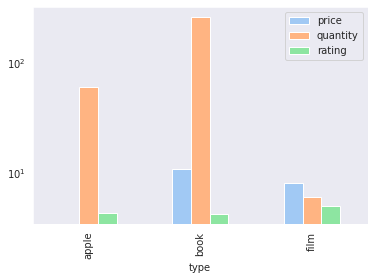

In [12]:
product_df.llm.query("Group by type and take the mean of all numeric columns.", yolo=True).llm.query("Make a bar plot of the result and use a log scale.", yolo=True)